In [17]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("./malenia.csv")
df

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
0,299.0,RAW_MELEE,124.0,2.0,True,66.0,INNER,2.0,RAW_MELEE,True
1,261.0,HYBRID,169.0,2.0,True,92.0,CENTER,2.0,PROC_CAST,True
2,148.0,PROC_MELEE,179.0,1.0,True,93.0,INNER,1.0,NaN,NaN
3,247.0,RAW_CAST,141.0,2.0,False,89.0,INNER,2.0,RAW_MELEE,False
4,163.0,PROC_CAST,126.0,1.0,True,64.0,INNER,2.0,PROC_MELEE,True
...,...,...,...,...,...,...,...,...,...,...
3616,204.0,RAW_CAST,171.0,2.0,False,23.0,OUTER,1.0,NaN,NaN
3617,259.0,HYBRID,160.0,2.0,False,55.0,INNER,1.0,NaN,NaN
3618,288.0,PROC_CAST,173.0,2.0,False,60.0,INNER,2.0,HYBRID,True
3619,58.0,PROC_CAST,139.0,2.0,False,42.0,CENTER,1.0,NaN,NaN


In [62]:
df

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
0,299.0,RAW_MELEE,124.0,2.0,True,66.0,INNER,2.0,RAW_MELEE,1
1,261.0,HYBRID,169.0,2.0,True,92.0,CENTER,2.0,PROC_CAST,1
2,148.0,PROC_MELEE,179.0,1.0,True,93.0,INNER,1.0,NaN,2
3,247.0,RAW_CAST,141.0,2.0,False,89.0,INNER,2.0,RAW_MELEE,0
4,163.0,PROC_CAST,126.0,1.0,True,64.0,INNER,2.0,PROC_MELEE,1
...,...,...,...,...,...,...,...,...,...,...
3616,204.0,RAW_CAST,171.0,2.0,False,23.0,OUTER,1.0,NaN,2
3617,259.0,HYBRID,160.0,2.0,False,55.0,INNER,1.0,NaN,2
3618,288.0,PROC_CAST,173.0,2.0,False,60.0,INNER,2.0,HYBRID,1
3619,58.0,PROC_CAST,139.0,2.0,False,42.0,CENTER,1.0,NaN,2


In [4]:
df.isna().sum()

Host_Death_Time       0
Host_Build            0
Level                 0
Phase                 0
Waterflow_Death       0
Health_Pct            0
Location              0
Phantom_Count         0
Phantom_Build      1196
Phantom_Death      1196
dtype: int64

In [50]:
idxs = df['Phantom_Build'].isna()
lists = df.loc[idxs]
lists['Phantom_Count'] = 0 
lists
df.loc[idxs] = lists

/var/folders/9t/21y55twj0rx52zcqfp7jnhgw0000gn/T/ipykernel_24280/4291215470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lists['Phantom_Count'] = 0


In [7]:
df['Location'].unique()

array(['INNER', 'CENTER', 'OUTER'], dtype=object)

# 레이블 인코딩

In [12]:
import seaborn as sns 

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Phantom_Death'])
digit_label = encoder.transform(df['Phantom_Death'])
digit_label

array([1, 1, 2, ..., 1, 2, 0])

In [59]:
df['Phantom_Death'] = digit_label

In [60]:
df

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
0,299.0,RAW_MELEE,124.0,2.0,True,66.0,INNER,2.0,RAW_MELEE,1
1,261.0,HYBRID,169.0,2.0,True,92.0,CENTER,2.0,PROC_CAST,1
2,148.0,PROC_MELEE,179.0,1.0,True,93.0,INNER,1.0,NaN,2
3,247.0,RAW_CAST,141.0,2.0,False,89.0,INNER,2.0,RAW_MELEE,0
4,163.0,PROC_CAST,126.0,1.0,True,64.0,INNER,2.0,PROC_MELEE,1
...,...,...,...,...,...,...,...,...,...,...
3616,204.0,RAW_CAST,171.0,2.0,False,23.0,OUTER,1.0,NaN,2
3617,259.0,HYBRID,160.0,2.0,False,55.0,INNER,1.0,NaN,2
3618,288.0,PROC_CAST,173.0,2.0,False,60.0,INNER,2.0,HYBRID,1
3619,58.0,PROC_CAST,139.0,2.0,False,42.0,CENTER,1.0,NaN,2


# 죽음에 대한 분석 그래프

<AxesSubplot:xlabel='Level', ylabel='Host_Death_Time'>

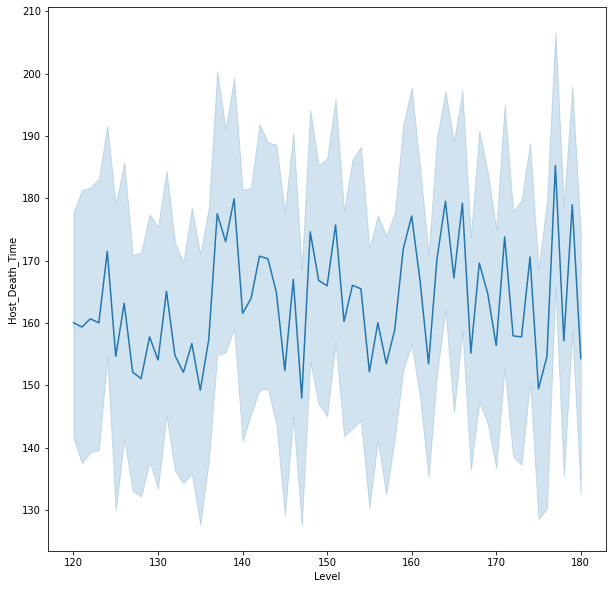

In [27]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y="Host_Death_Time",x="Level")

<AxesSubplot:xlabel='Host_Build', ylabel='Host_Death_Time'>

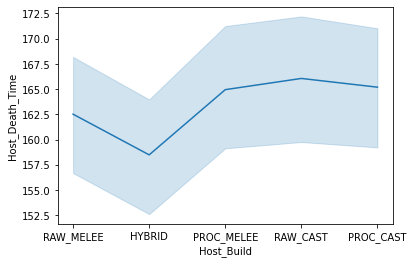

In [26]:
sns.lineplot(data=df,y="Host_Death_Time",x="Host_Build")

<AxesSubplot:xlabel='Phantom_Count', ylabel='Host_Death_Time'>

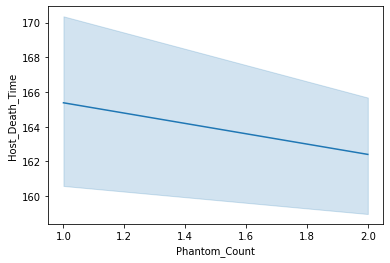

In [25]:
sns.lineplot(data=df,y="Host_Death_Time",x="Phantom_Count")

<AxesSubplot:xlabel='Phase', ylabel='Host_Death_Time'>

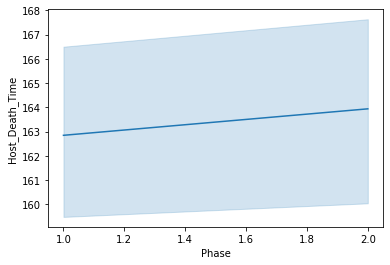

In [24]:
sns.lineplot(data=df,y="Host_Death_Time",x="Phase")

<AxesSubplot:xlabel='Phantom_Build', ylabel='Host_Death_Time'>

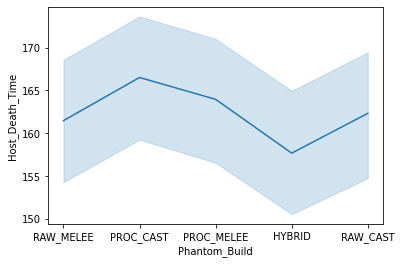

In [30]:
sns.lineplot(data=df,y="Host_Death_Time",x="Phantom_Build")

<AxesSubplot:xlabel='Phantom_Death', ylabel='Host_Death_Time'>

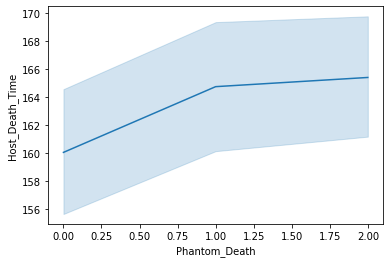

In [61]:
sns.lineplot(data=df,y="Host_Death_Time",x="Phantom_Death")

# 페이즈에 대한 분석

<AxesSubplot:xlabel='Level', ylabel='Phase'>

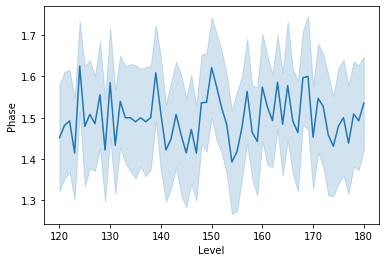

In [31]:
sns.lineplot(data=df,y="Phase",x="Level")

<AxesSubplot:xlabel='Phantom_Count', ylabel='Phase'>

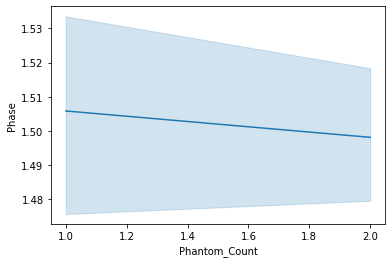

In [32]:
sns.lineplot(data=df,y="Phase",x="Phantom_Count")

<AxesSubplot:xlabel='Phantom_Death', ylabel='Phase'>

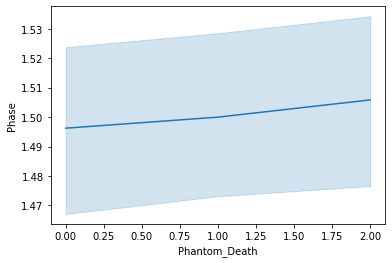

In [64]:
sns.lineplot(data=df,y="Phase",x="Phantom_Death")

<AxesSubplot:xlabel='Host_Build', ylabel='Phase'>

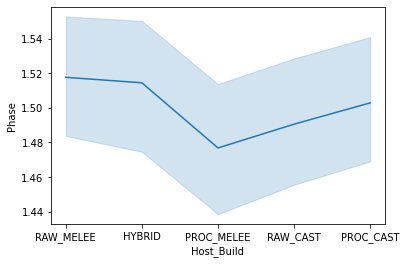

In [65]:
sns.lineplot(data=df,y="Phase",x="Host_Build")

<AxesSubplot:xlabel='Host_Death_Time', ylabel='Phase'>

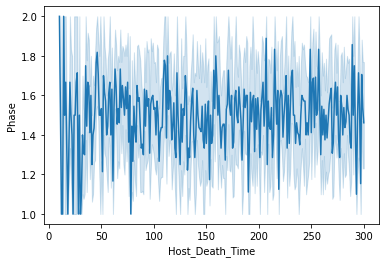

In [71]:
sns.lineplot(data=df,y="Phase",x="Host_Death_Time")

In [75]:
df[df['Host_Death_Time']<12]

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
982,11.0,PROC_MELEE,159.0,2.0,False,86.0,CENTER,1.0,NaN,2
1628,11.0,PROC_CAST,158.0,1.0,False,92.0,OUTER,2.0,RAW_CAST,1
2303,11.0,PROC_MELEE,133.0,1.0,False,88.0,INNER,2.0,PROC_MELEE,0
2548,11.0,PROC_CAST,173.0,2.0,True,83.0,OUTER,2.0,RAW_MELEE,0
2699,10.0,PROC_MELEE,122.0,2.0,True,78.0,CENTER,1.0,NaN,2
